## 시계열 분류 및 클러스터링

시계열 간의 유사성 측정 방법

### 유클리드 거리

두 시계열 간의 유클리드 거리 계산하기
유사성 측정 값으로 유클리드 거리를 결정하기 전에 원하는 기준을 명확하게 명시해야 한다.

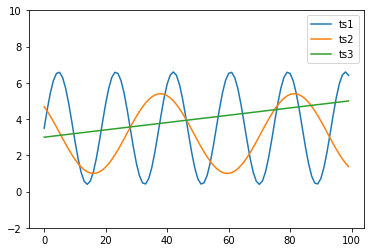

In [2]:
import  pandas  as  pd 
import numpy as np
import matplotlib.pylab as plt

x=np.linspace(0,50,100)
ts1=pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2=pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3=pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

## DTW 거리 측정


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4e4aa0810>,
       dtype=object))

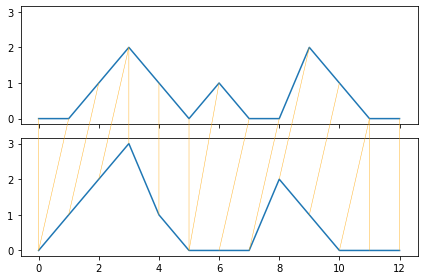

In [1]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
#dtwvis.plot_warping(s1, s2, path, filename="warp.png")

In [2]:
from dtaidistance import dtw
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance = dtw.distance(s1, s2)
print(distance)

1.4142135623730951


In [3]:
from dtaidistance import dtw
import array
s1 = array.array('d',[0, 0, 1, 2, 1, 0, 1, 0, 0])
s2 = array.array('d',[0, 1, 2, 0, 0, 0, 0, 0, 0])
d = dtw.distance_fast(s1, s2, use_pruning=True)

In [4]:
from dtaidistance import dtw
import numpy as np
s1 = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double)
s2 = np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0])
d = dtw.distance_fast(s1, s2, use_pruning=True)

In [5]:
print(dtw.distance.__doc__)


    Dynamic Time Warping.

    This function keeps a compact matrix, not the full warping paths matrix.

    :param s1: First sequence
    :param s2: Second sequence
    :param window: Only allow for maximal shifts from the two diagonals smaller than this number.
        It includes the diagonal, meaning that an Euclidean distance is obtained by setting window=1.
    :param max_dist: Stop if the returned values will be larger than this value
    :param max_step: Do not allow steps larger than this value
    :param max_length_diff: Return infinity if length of two series is larger
    :param penalty: Penalty to add if compression or expansion is applied
    :param psi: Psi relaxation parameter (ignore start and end of matching).
        Useful for cyclical series.
    :param use_c: Use fast pure c compiled functions
    :param use_pruning: Prune values based on Euclidean distance.
        This is the same as passing ub_euclidean() to max_dist
    :param only_ub: Only compute the upper 

In [6]:
from dtaidistance import dtw
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance, paths = dtw.warping_paths(s1, s2)
print(distance)
print(paths)

1.4142135623730951
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf]
 [       inf 0.         1.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798]
 [       inf 0.         1.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798]
 [       inf 1.         0.         1.         1.41421356 1.73205081
  2.         2.23606798 2.44948974 2.44948974]
 [       inf 2.23606798 1.         0.         2.         2.44948974
  2.64575131 2.82842712 3.         3.16227766]
 [       inf 2.44948974 1.         1.         1.         1.41421356
  1.73205081 2.         2.23606798 2.44948974]
 [       inf 2.44948974 1.41421356 2.23606798 1.         1.
  1.         1.         1.         1.        ]
 [       inf 2.64575131 1.41421356 1.73205081 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356]
 [       inf 2.64575131 1.73205081 2.44948974 1.41421356 1.41421356
 

[1.22249341 2.89993458 4.08619221]
0


/Users/wan/opt/anaconda3/lib/python3.7/site-packages/dtaidistance/dtw.py:428: RuntimeWarning: invalid value encountered in sqrt
  dtw = np.sqrt(dtw)


(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9c8a6cd290>])

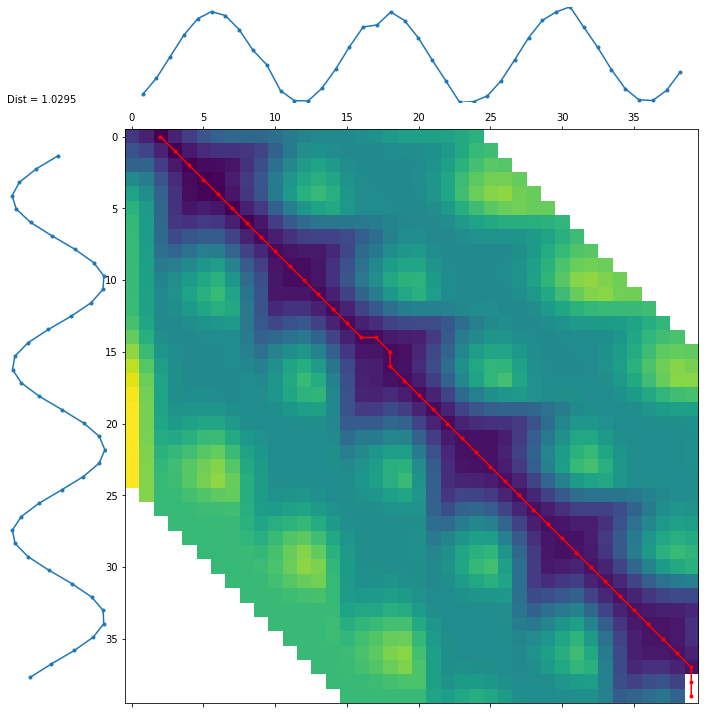

In [7]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [12]:
from dtaidistance import dtw
import numpy as np
series = [
    np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double),
    np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0.0, 0, 1, 2, 1, 0, 0, 0])]
ds = dtw.distance_matrix_fast(series)

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



KeyboardInterrupt: 

In [9]:
from dtaidistance import dtw
import numpy as np
series = np.matrix([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])
ds = dtw.distance_matrix_fast(series)

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



In [3]:
from dtaidistance import dtw
import numpy as np
series = np.matrix([
     [0., 0, 1, 2, 1, 0, 1, 0, 0],
     [0., 1, 2, 0, 0, 0, 0, 0, 0],
     [1., 2, 0, 0, 0, 0, 0, 1, 1],
     [0., 0, 1, 2, 1, 0, 1, 0, 0],
     [0., 1, 2, 0, 0, 0, 0, 0, 0],
     [1., 2, 0, 0, 0, 0, 0, 1, 1]])
ds = dtw.distance_matrix_fast(series, block=((1, 4), (3, 5)))

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



In [ ]:
from dtaidistance import clustering
# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(series)
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(series)
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.

 83%|████████▎ | 5/6 [00:00<00:00, 5663.39it/s]
The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.

